In [1]:
from mueller_matrices import M_Retarder, M_Diattenuator, M_rotate, M_LinearPolarizer, stokes2ellipse
from plotting import plotEllipse, plotEllipseStokes
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Simulating Different LC Configurations

In [2]:
HWP = M_Retarder(theta=0,delta=np.pi/4)
QWP = M_Retarder(theta=np.pi/4,delta=np.pi/2)

HWP
# HWP

Matrix([
[1, 0,                  0,                 0],
[0, 1,                  0,                 0],
[0, 0,  0.707106781186548, 0.707106781186547],
[0, 0, -0.707106781186547, 0.707106781186548]])

In [10]:
def M_inst(e):
    M = sp.Matrix([[1, 0, 0, -1],
                  [1, np.cos(2*np.arctan(e)), 0, -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))],
                  [1, -0.5*np.cos(2*np.arctan(e)), -np.sqrt(3)/2*np.cos(2*np.arctan(e)), -np.sin(2*np.arctan(e))]])
                   
    return M


#LCP
M_analyzer = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_analyzerVert = sp.Matrix([[1, -1, 0, 0],
                        [-1, 1, 0, 0],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0]])/2

M_horiz_pol = sp.Matrix([[1,-1,0,0],
                         [-1,1,0,0],
                         [0, 0, 0, 0],
                         [0, 0, 0, 0]])

In [11]:
M_60 = M_rotate(M_analyzerVert, -np.pi/3)
M_120 = M_rotate(M_analyzerVert, -2*np.pi/3)

In [12]:
%%time
lca = np.arange(-1.5,1.5,0.01)
lcb = np.arange(-1.5,1.5,0.01)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
e = np.empty([len(lca),len(lcb)])
theta = np.empty([len(lca),len(lcb)])
S0 = np.empty([len(lca),len(lcb)])
S1 = np.empty([len(lca),len(lcb)])
S2 = np.empty([len(lca),len(lcb)])
S3 = np.empty([len(lca),len(lcb)])

for i in range(len(lca)):
    for j in range(len(lcb)):
        M_uni = M_Retarder(theta=0, delta = lcb[j]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = lca[i]*2*np.pi)
        S_out = M_uni * S_in
        S_final = M_analyzer * S_out
        S0[i,j] = S_final[0]
        S1[i,j] = S_final[1]
        S2[i,j] = S_final[2]
        S3[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        e[i,j] = ellipt
        theta[i,j] = orient

CPU times: user 1min 31s, sys: 174 ms, total: 1min 31s
Wall time: 1min 32s


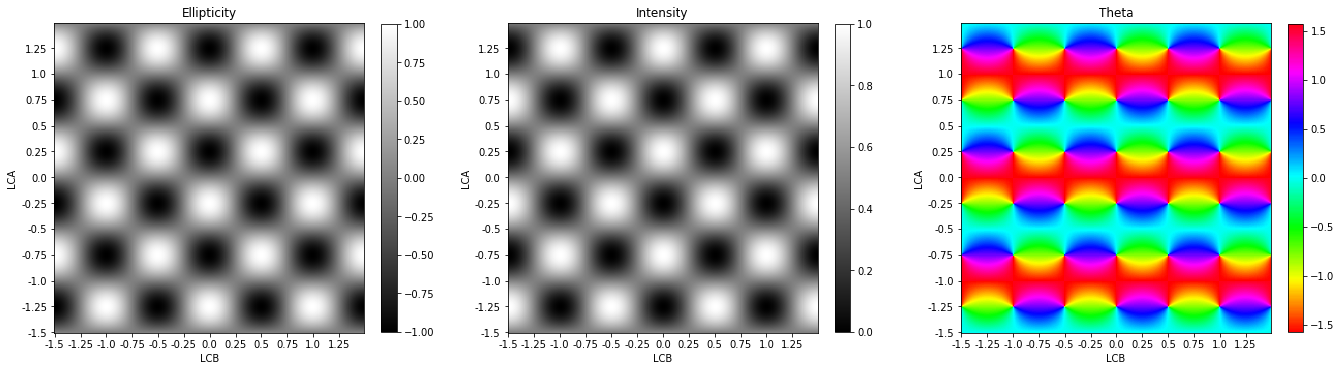

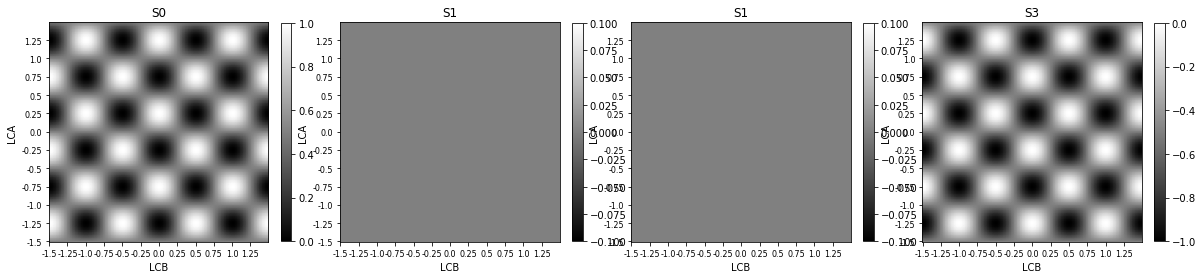

In [13]:
fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=8)
im1 = ax[0].imshow(e, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(theta, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)
fig.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/sim_overview.png')


fig, ax = plt.subplots(1,4, figsize=(20,20))
im1 = ax[0].imshow(S0, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,300,25))
ax[0].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[0].set_yticks(np.arange(0,300,25))
ax[0].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,300,25))
ax[1].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[1].set_yticks(np.arange(0,300,25))
ax[1].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2, "gray", origin = 'lower')
ax[2].set_title('S1')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,300,25))
ax[2].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[2].set_yticks(np.arange(0,300,25))
ax[2].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,300,25))
ax[3].set_xticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
ax[3].set_yticks(np.arange(0,300,25))
ax[3].set_yticklabels(np.arange(-1.5,1.5,0.25), fontsize=8)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

## ZOOM IN

Run the same simulation but confine the region to LCA: [.2, .3], LCB: [.45,.55]

In [18]:
%%time

lca_z = np.arange(0.2,0.3,0.0005)
lcb_z = np.arange(0.45,0.55-0.0005,0.0005)
S_in = sp.Matrix([1, -1, 0, 0])

# get ellipticity, orientation
ez = np.empty([len(lca_z),len(lcb_z)])
thetaz = np.empty([len(lca_z),len(lcb_z)])
S0z = np.empty([len(lca_z),len(lcb_z)])
S1z = np.empty([len(lca_z),len(lcb_z)])
S2z = np.empty([len(lca_z),len(lcb_z)])
S3z = np.empty([len(lca_z),len(lcb_z)])


for i in range(len(lca_z)):
    for j in range(len(lcb_z)):
        M_uni = M_Retarder(theta=0, delta = lcb_z[j]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = lca_z[i]*2*np.pi)
        S_out = M_uni * S_in
        S_final = M_analyzer * S_out
        S0z[i,j] = S_final[0]
        S1z[i,j] = S_final[1]
        S2z[i,j] = S_final[2]
        S3z[i,j] = S_final[3]
        ellipt,orient=stokes2ellipse(np.array(S_out).astype(np.float64))
        ez[i,j] = ellipt
        thetaz[i,j] = orient

CPU times: user 41.2 s, sys: 94.6 ms, total: 41.3 s
Wall time: 41.5 s


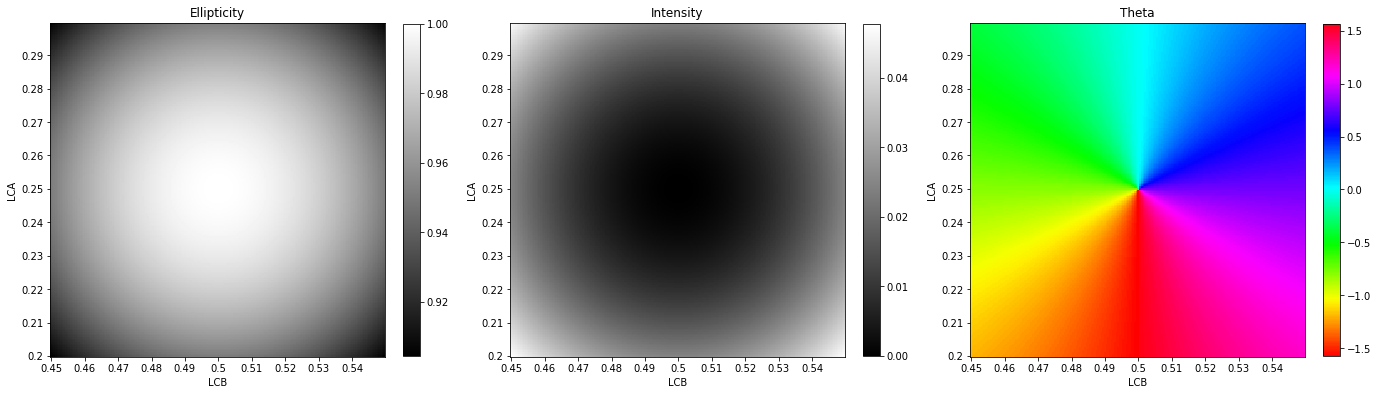

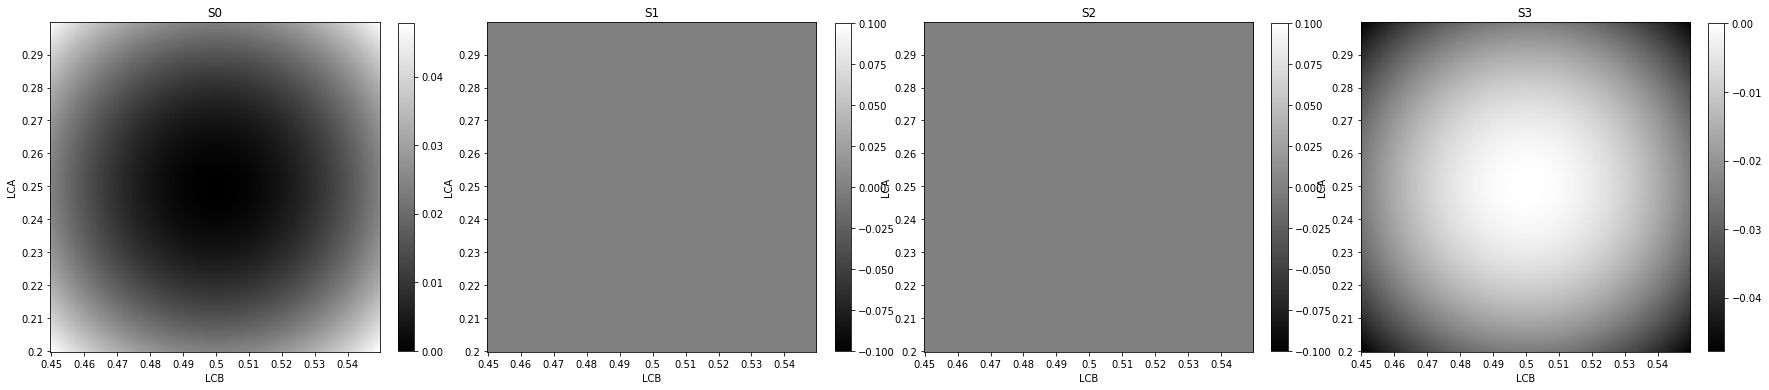

In [19]:
y_range = [0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29]
x_range = [0.45, 0.46, 0.47, 0.48, 0.49, 0.50, 0.51, 0.52, 0.53, 0.54]


fig, ax = plt.subplots(1,3, figsize=(20,20))
fig.tight_layout(pad=6)
im1 = ax[0].imshow(ez, "gray", origin = 'lower')
ax[0].set_title('Ellipticity')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)

im2 = ax[1].imshow(S0z, "gray", origin = 'lower')
ax[1].set_title('Intensity')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(thetaz, "hsv", origin = 'lower')
ax[2].set_title('Theta')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)
# fig.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/sim_zoom.png')


fig, ax = plt.subplots(1,4, figsize=(30,30))
im1 = ax[0].imshow(S0z, "gray", origin = 'lower')
ax[0].set_title('S0')
ax[0].set_xlabel('LCB')
ax[0].set_ylabel('LCA')
ax[0].set_xticks(np.arange(0,200,20))
ax[0].set_xticklabels(x_range, fontsize=10)
ax[0].set_yticks(np.arange(0,200,20))
ax[0].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im1, ax=ax[0], fraction=0.045)


im2 = ax[1].imshow(S1z, "gray", origin = 'lower')
ax[1].set_title('S1')
ax[1].set_xlabel('LCB')
ax[1].set_ylabel('LCA')
ax[1].set_xticks(np.arange(0,200,20))
ax[1].set_xticklabels(x_range, fontsize=10)
ax[1].set_yticks(np.arange(0,200,20))
ax[1].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im2, ax=ax[1], fraction=0.045)

im3 = ax[2].imshow(S2z, "gray", origin = 'lower')
ax[2].set_title('S2')
ax[2].set_xlabel('LCB')
ax[2].set_ylabel('LCA')
ax[2].set_xticks(np.arange(0,200,20))
ax[2].set_xticklabels(x_range, fontsize=10)
ax[2].set_yticks(np.arange(0,200,20))
ax[2].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im3, ax=ax[2], fraction=0.045)

im4 = ax[3].imshow(S3z, "gray", origin = 'lower')
ax[3].set_title('S3')
ax[3].set_xlabel('LCB')
ax[3].set_ylabel('LCA')
ax[3].set_xticks(np.arange(0,200,20))
ax[3].set_xticklabels(x_range, fontsize=10)
ax[3].set_yticks(np.arange(0,200,20))
ax[3].set_yticklabels(y_range, fontsize=10)
fig.colorbar(im4, ax=ax[3], fraction=0.045)

## Finding which LC Values correspond to 0, 60, 120 deg states

In [21]:
state60 = []
state120 = []
state0 = []
for i in range(len(thetaz[:,0])):
    for j in range(len(thetaz[0,:])):
        if np.pi/3-.0005 < thetaz[i,j] < np.pi/3 + .0005:
            state60.append((lca_z[i],lcb_z[j]))
        elif (-np.pi/3-.0005) < thetaz[i,j] < (-np.pi/3 + .0005):
            state120.append((lca_z[i],lcb_z[j]))
            
        elif (0-.000001) < thetaz[i,j] < (0 + .000001):
            state0.append((lca_z[i],lcb_z[j]))
        

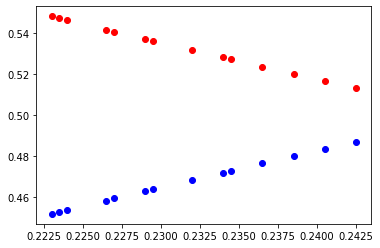

In [457]:
for i in range(len(state60)):
    plt.scatter(state60[i][0], state60[i][1], color = 'red')
    plt.scatter(state120[i][0], state120[i][1], color = 'blue')
    
plt.title()
plt.show()

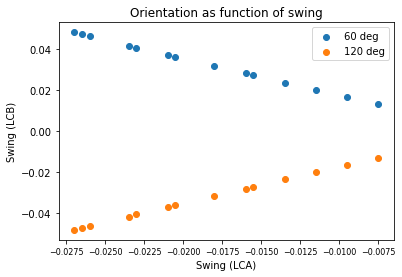

In [459]:
a120 = []
b120 = []
a60 = []
b60 = []
swinga = []
swingb120 = []
swingb60 = []


for i in range(len(state60)):
    a120.append(state120[i][0])
    b120.append(state120[i][1])
    a60.append(state60[i][0])
    b60.append(state60[i][1])
    swinga.append(state60[i][0]-0.25)
    swingb60.append(state60[i][1]-0.5)
    swingb120.append(state120[i][1]-0.5)
    
plt.scatter(swinga,swingb60, label="60 deg")
plt.scatter(swinga,swingb120, label="120 deg")
plt.ylabel('Swing (LCB)')
plt.xlabel('Swing (LCA)')
plt.xticks(fontsize=8)
plt.legend()
plt.title('Orientation as function of swing')
plt.savefig('/Users/cameron.foltz/Desktop/SlidePics/200824_Calibration/swing.png')
plt.show()
# plt.scatter(b60,a60)
# plt.title('60')
# plt.show()

In [460]:
from scipy.stats import linregress
linregress(swinga, swingb60)

LinregressResult(slope=-1.793327154772937, intercept=-0.0006408380775848946, rvalue=-0.9999457923500247, pvalue=3.6627310457324055e-25, stderr=0.005390534707323523)

## Simulate rotation of linear polarizer stage to confirm states

Simulate placing rotating linear polarizer on stage and rotation through 360 degrees

In [71]:
%%time
## Simulate 60 deg

deg60 = [0.22350000000000003, 0.5470000000000002]
deg120 = [0.22350000000000003, 0.453]
deg0 = [0.2800000000000001, 0.5]
deg45 = [0.25, 0.53]
deg135 = [0.25, 0.47]
deg90 = [0.22,0.5]


degExt = [0.25, 0.5]
swing = 0.03

S_in = sp.Matrix([1, -1, 0, 0])

S0_0 = np.zeros(360)
S0_60 = np.zeros(360)
S0_120 = np.zeros(360)

S0_45 = np.zeros(360)
S0_135 = np.zeros(360)
S0_0 = np.zeros(360)
S0_90 = np.zeros(360)
S0_ext = np.zeros(360)


j = 0
for i in np.linspace(0,2*np.pi,360):
    M_lin = M_rotate(M_horiz_pol,i)
    M_uni_0 = M_Retarder(theta=0, delta = deg0[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg0[0]*2*np.pi)
    M_uni_60 = M_Retarder(theta=0, delta = deg60[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg60[0]*2*np.pi)
    M_uni_120 = M_Retarder(theta=0, delta = deg120[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg120[0]*2*np.pi)
    
    M_uni_ext = M_Retarder(theta=0, delta = degExt[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = degExt[0]*2*np.pi)
    M_uni_45 = M_Retarder(theta=0, delta = deg45[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg45[0]*2*np.pi)
    M_uni_90 = M_Retarder(theta=0, delta = deg90[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg90[0]*2*np.pi)
    M_uni_135 = M_Retarder(theta=0, delta = deg135[1]*2*np.pi) * M_Retarder(theta=np.pi/4, delta = deg135[0]*2*np.pi)
    
    S_out_0 = M_analyzer * M_lin * M_uni_0 * S_in
    S_out_60 = M_analyzer * M_lin * M_uni_60 * S_in
    S_out_120 = M_analyzer * M_lin * M_uni_120 * S_in
    
    S_out_ext = M_analyzer * M_lin * M_uni_ext * S_in
    S_out_45 = M_analyzer * M_lin * M_uni_45 * S_in
    S_out_90 = M_analyzer * M_lin * M_uni_90 * S_in
    S_out_135 = M_analyzer * M_lin * M_uni_135 * S_in
    
    S0_ext[j] = S_out_ext[0]
    S0_45[j] = S_out_45[0]
    S0_90[j] = S_out_90[0]
    S0_135[j] = S_out_135[0]
    
    S0_0[j] = S_out_0[0]
    S0_60[j] = S_out_60[0]
    S0_120[j] = S_out_120[0]
    j += 1
    

CPU times: user 3.65 s, sys: 15.9 ms, total: 3.66 s
Wall time: 3.68 s


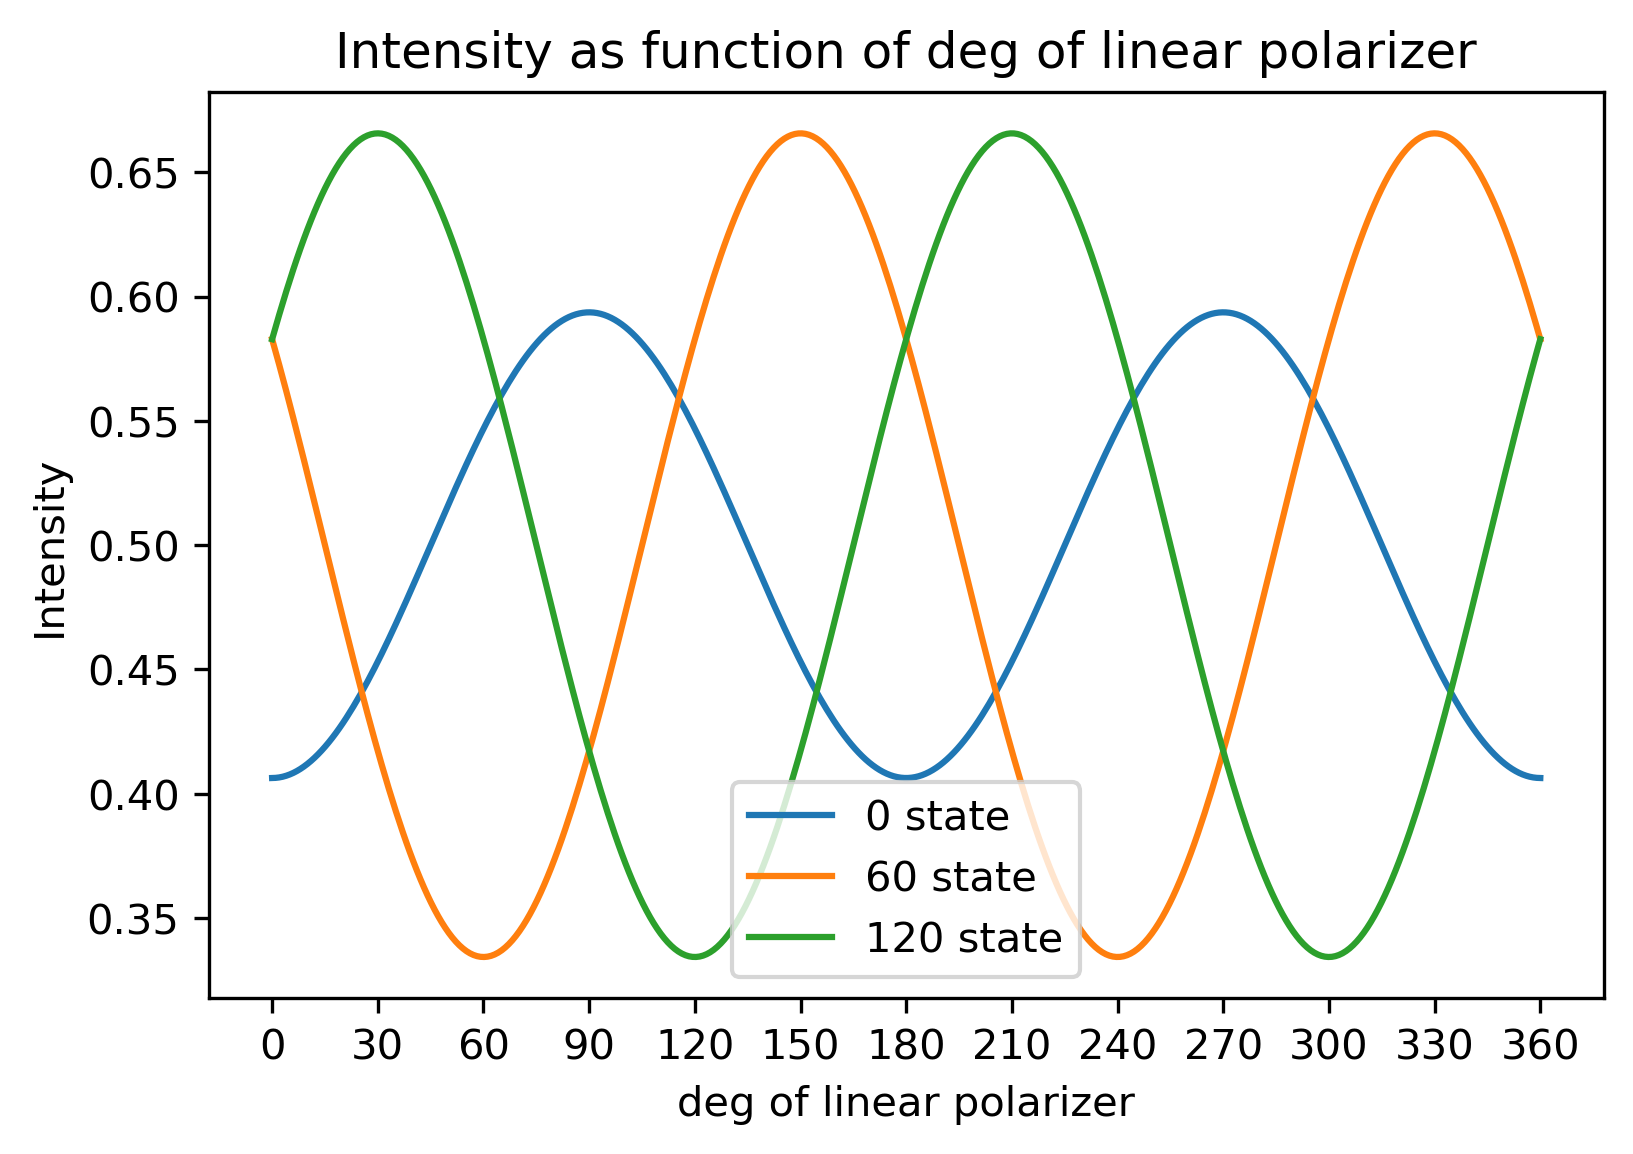

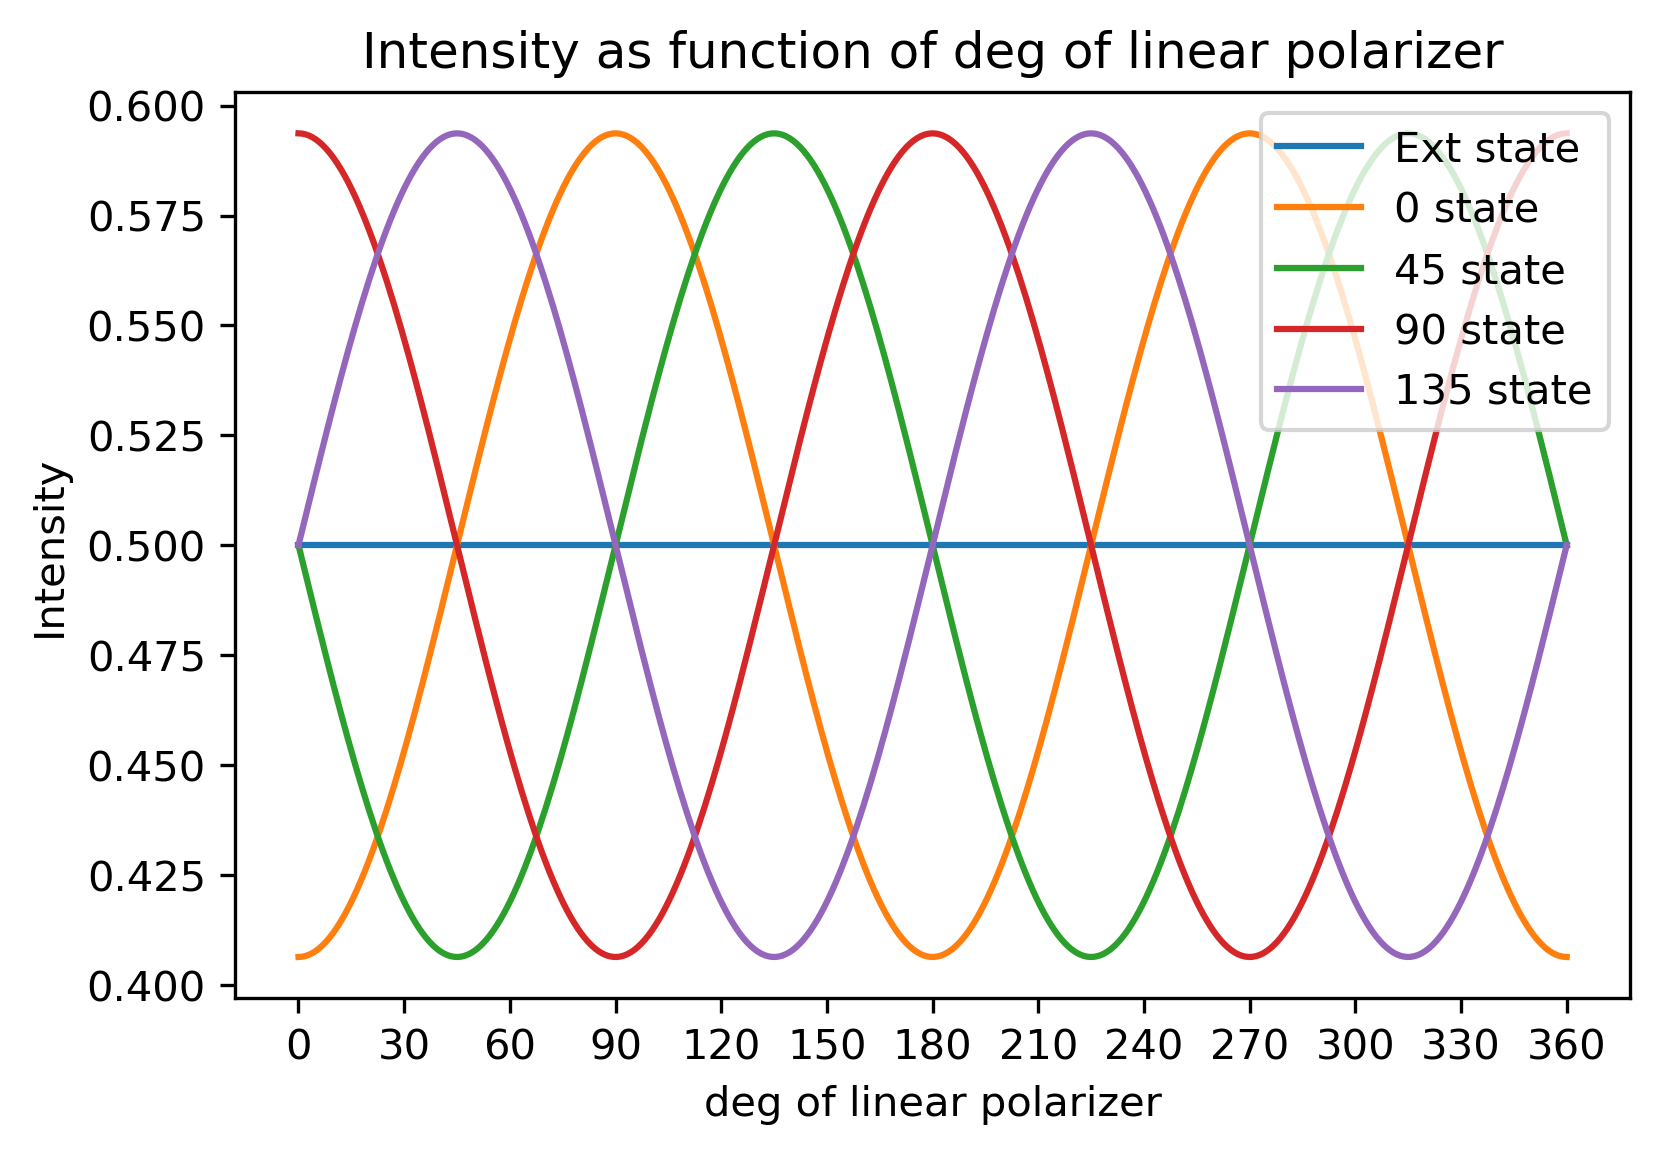

In [72]:
x = np.linspace(0,360,360)

plt.figure(dpi=300)
plt.xticks(np.arange(0,390,30))
plt.xlabel('deg of linear polarizer')
plt.ylabel('Intensity')
plt.title('Intensity as function of deg of linear polarizer')
plt.plot(x,S0_0, label='0 state')
plt.plot(x,S0_60, label='60 state')
plt.plot(x,S0_120, label='120 state')
plt.legend()
plt.show()

plt.figure(dpi=300)
plt.xticks(np.arange(0,390,30))
plt.xlabel('deg of linear polarizer')
plt.ylabel('Intensity')
plt.title('Intensity as function of deg of linear polarizer')
plt.plot(x,S0_ext, label='Ext state')
plt.plot(x,S0_0, label='0 state')
plt.plot(x,S0_45, label='45 state')
plt.plot(x,S0_90, label='90 state')
plt.plot(x,S0_135, label='135 state')
plt.legend()
plt.show()

## Sanity Checking

In [67]:
M_LCP = sp.Matrix([[1, 0, 0, -1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [-1, 0, 0, 1]])/2

M_RCP = sp.Matrix([[1, 0, 0, 1],
                        [0, 0, 0, 0],
                        [0, 0, 0, 0],
                        [1, 0, 0, 1]])/2

M_uni = M_Retarder(theta=0, delta = 0.5*2*np.pi) * M_Retarder(theta=np.pi/4, delta = 0.25*2*np.pi)
S_out = M_uni * S_in
S_final = M_RCP * S_out

S_final

Matrix([
[1.0],
[  0],
[  0],
[1.0]])